# Facebook Prophet for foot traffic
## setup imports


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.layers import Dense, Dropout, LSTM

import datetime as dt

from fbprophet import Prophet


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Setup training data


In [2]:
company = 'FB'
start = dt.datetime(2012, 1, 1)
# end = dt.datetime(2020, 1, 1)
end = dt.datetime.now() - dt.timedelta(days=1)
CLOSE = 'Close'
train_data = web.DataReader(company, 'yahoo', start, end)
train_close_data = train_data[CLOSE]




In [3]:
df = train_data['Close']
df = df.reset_index()
df = df.rename(columns = {'index':'ds'})
# # Creates the datetime object from date
df.columns=["ds", "y"]
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


## setup model and predicitons

In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# place holder for future predictions
future = m.make_future_dataframe(periods=365)

forcast = m.predict(future)



In [12]:
forcast[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail(7)

,ds,yhat_lower,yhat_upper,yhat
2588,2022-03-24,309.910950,356.772233,332.492511
2589,2022-03-25,308.394703,357.222852,332.439967
2590,2022-03-26,319.197628,367.519771,343.120998
2591,2022-03-27,319.280321,368.345544,343.151568
2592,2022-03-28,309.071617,358.245448,332.341503
2593,2022-03-29,308.831463,356.271522,332.669375
2594,2022-03-30,308.281149,355.726994,332.779503


## plot actual vs predicted

In [13]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
fig = plot_plotly(m, forcast, ylabel=f'{company} close price', xlabel='date')

fig.update_layout(title=company)
py.plot(fig, filename=f"{company}.html")
fig.show()

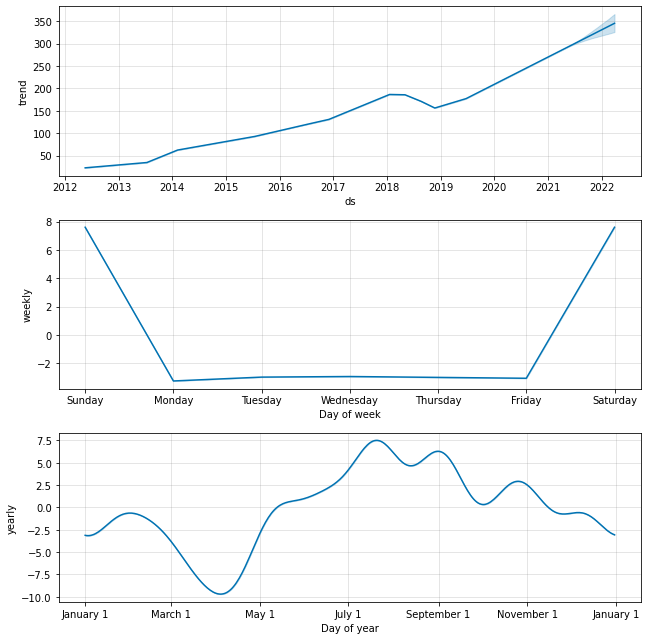

In [14]:
m.plot_components(forcast);

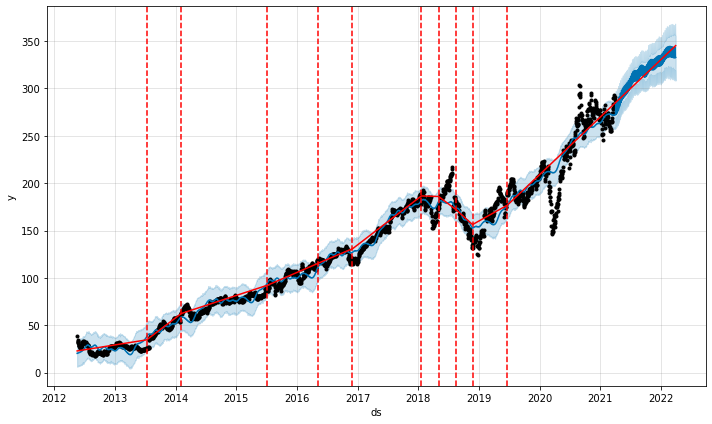

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forcast)
a = add_changepoints_to_plot(fig.gca(), m, forcast)

## RMSE: how good is it

In [16]:

# se = np.square(forcast.loc[:, 'yhat'][-10:] - df['y'][-10:])
se = np.square(forcast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse_str = "{:0.2f}".format(rmse)
print("rmse: " + rmse_str)

rmse: 10.82
